In [1]:
import pandas as pd
import numpy as np

file_path = "C:/Users/chira/Desktop/on_going_projects/FLOOD_DETETION_MODEL/bangalore_urban_flood_prediction_AI.csv" 
df = pd.read_csv(file_path)
df.head()

,Latitude,Longitude,Altitude,Rainfall_Intensity,Temperature,Humidity,Atmospheric_Pressure,River_Level,Drainage_Capacity,Drainage_System_Condition,Population_Density,Urbanization_Level,flood
0,13.031867,77.531658,997.63,40.06,33.83,98.73,931.65,4.58,89.96,5,24933.97,3,1
1,12.877241,77.525416,893.85,138.76,29.91,83.63,922.12,6.65,1.30,4,9937.05,10,1
2,12.899599,77.517722,934.88,65.84,16.35,73.36,934.76,5.55,76.12,9,11088.95,2,0
3,12.893955,77.552339,929.47,138.25,31.94,44.72,930.82,6.46,22.18,4,12124.49,7,0
4,12.984063,77.538374,901.12,125.92,33.56,47.63,941.29,6.83,30.38,5,8446.10,5,1


## Distrubution of the all data

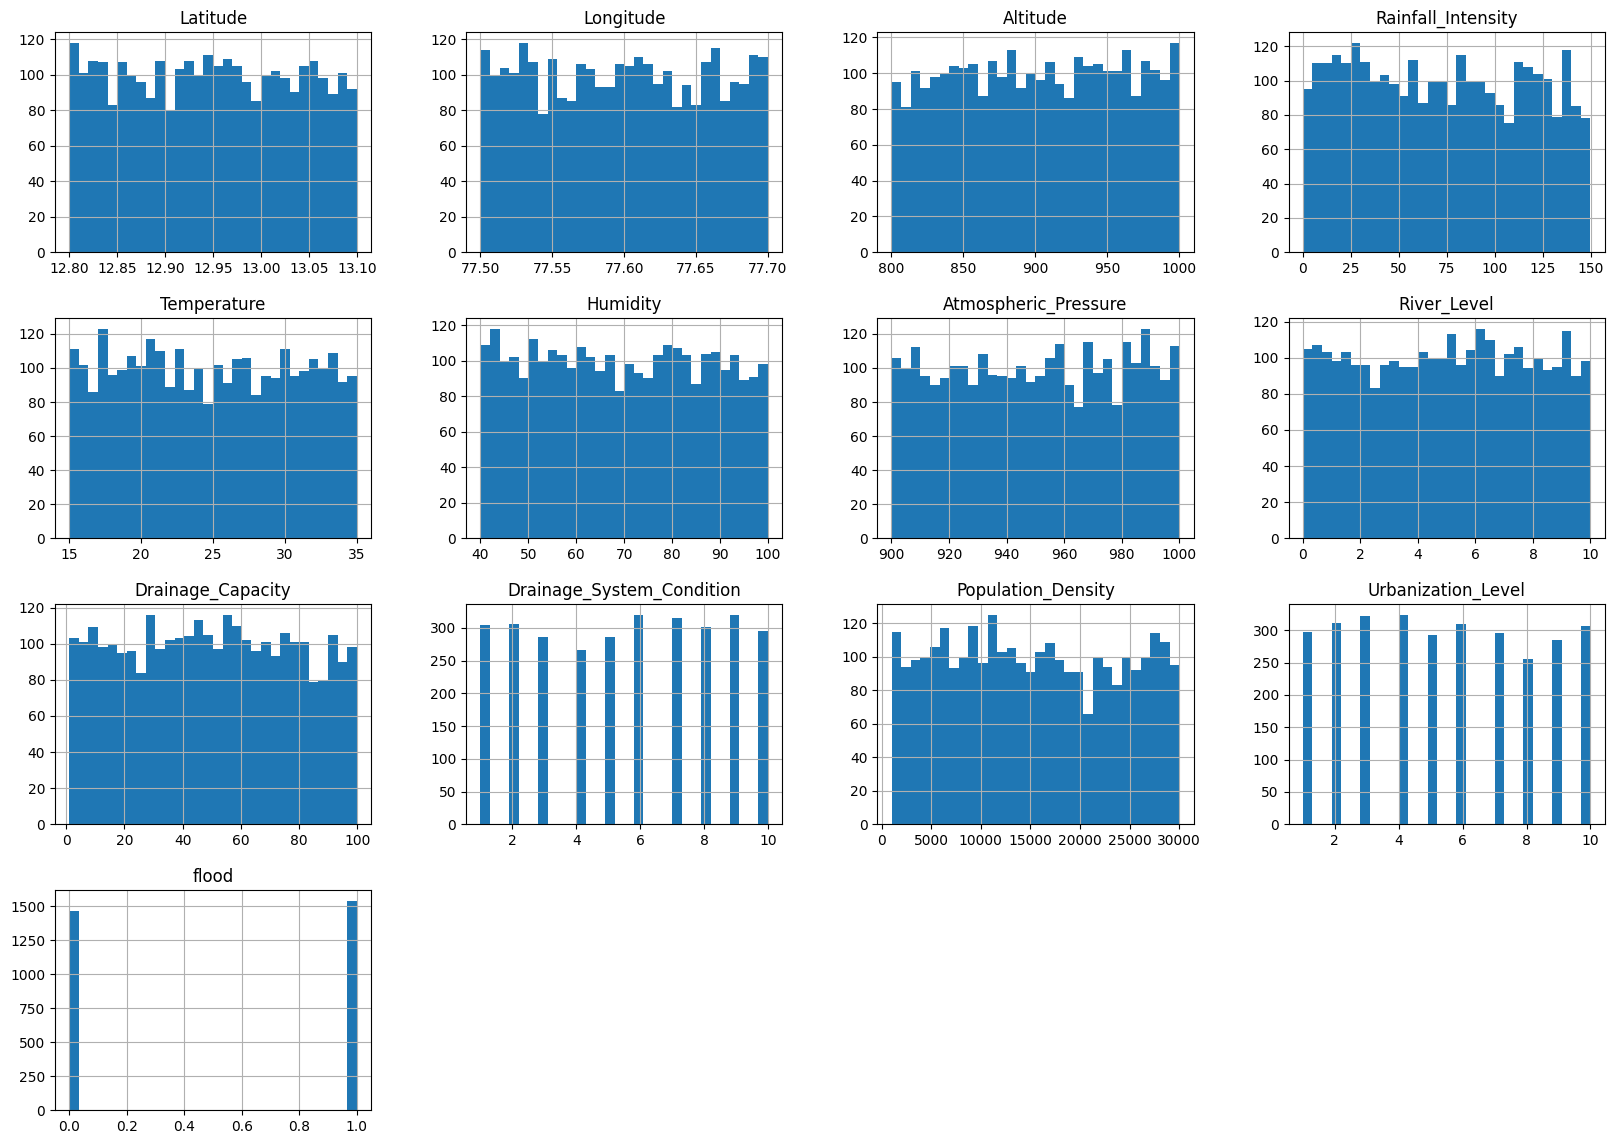

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(20, 14), bins=30)
plt.show()

#### Data we need the most for training ['Rainfall_Intensity', 'Temperature', 'Humidity','Atmospheric_Pressure']

### looking for how KDTress actually works

In [6]:
import pandas as pd
import numpy as np

file_path = "C:/Users/chira/Desktop/on_going_projects/Final_year/Dataset/bangalore_urban_flood_prediction_AI.csv"  
df = pd.read_csv(file_path)
df.head()

,Latitude,Longitude,Altitude,Rainfall_Intensity,Temperature,Humidity,Atmospheric_Pressure,River_Level,Drainage_Capacity,Drainage_System_Condition,Population_Density,Urbanization_Level,flood
0,13.031867,77.531658,997.63,40.06,33.83,98.73,931.65,4.58,89.96,5,24933.97,3,1
1,12.877241,77.525416,893.85,138.76,29.91,83.63,922.12,6.65,1.30,4,9937.05,10,1
2,12.899599,77.517722,934.88,65.84,16.35,73.36,934.76,5.55,76.12,9,11088.95,2,0
3,12.893955,77.552339,929.47,138.25,31.94,44.72,930.82,6.46,22.18,4,12124.49,7,0
4,12.984063,77.538374,901.12,125.92,33.56,47.63,941.29,6.83,30.38,5,8446.10,5,1


In [7]:
X = df[['Latitude', 'Longitude', 'Temperature', 'Humidity', 'Atmospheric_Pressure']]
y = df['flood']

In [8]:
X_long_lan = df[['Latitude','Longitude']]
X_long_lan

,Latitude,Longitude
0,13.031867,77.531658
1,12.877241,77.525416
2,12.899599,77.517722
3,12.893955,77.552339
4,12.984063,77.538374
...,...,...
2995,13.078096,77.587993
2996,13.035713,77.523857
2997,12.934399,77.666290
2998,13.021337,77.661109


IndexError: index 1 is out of bounds for axis 0 with size 1

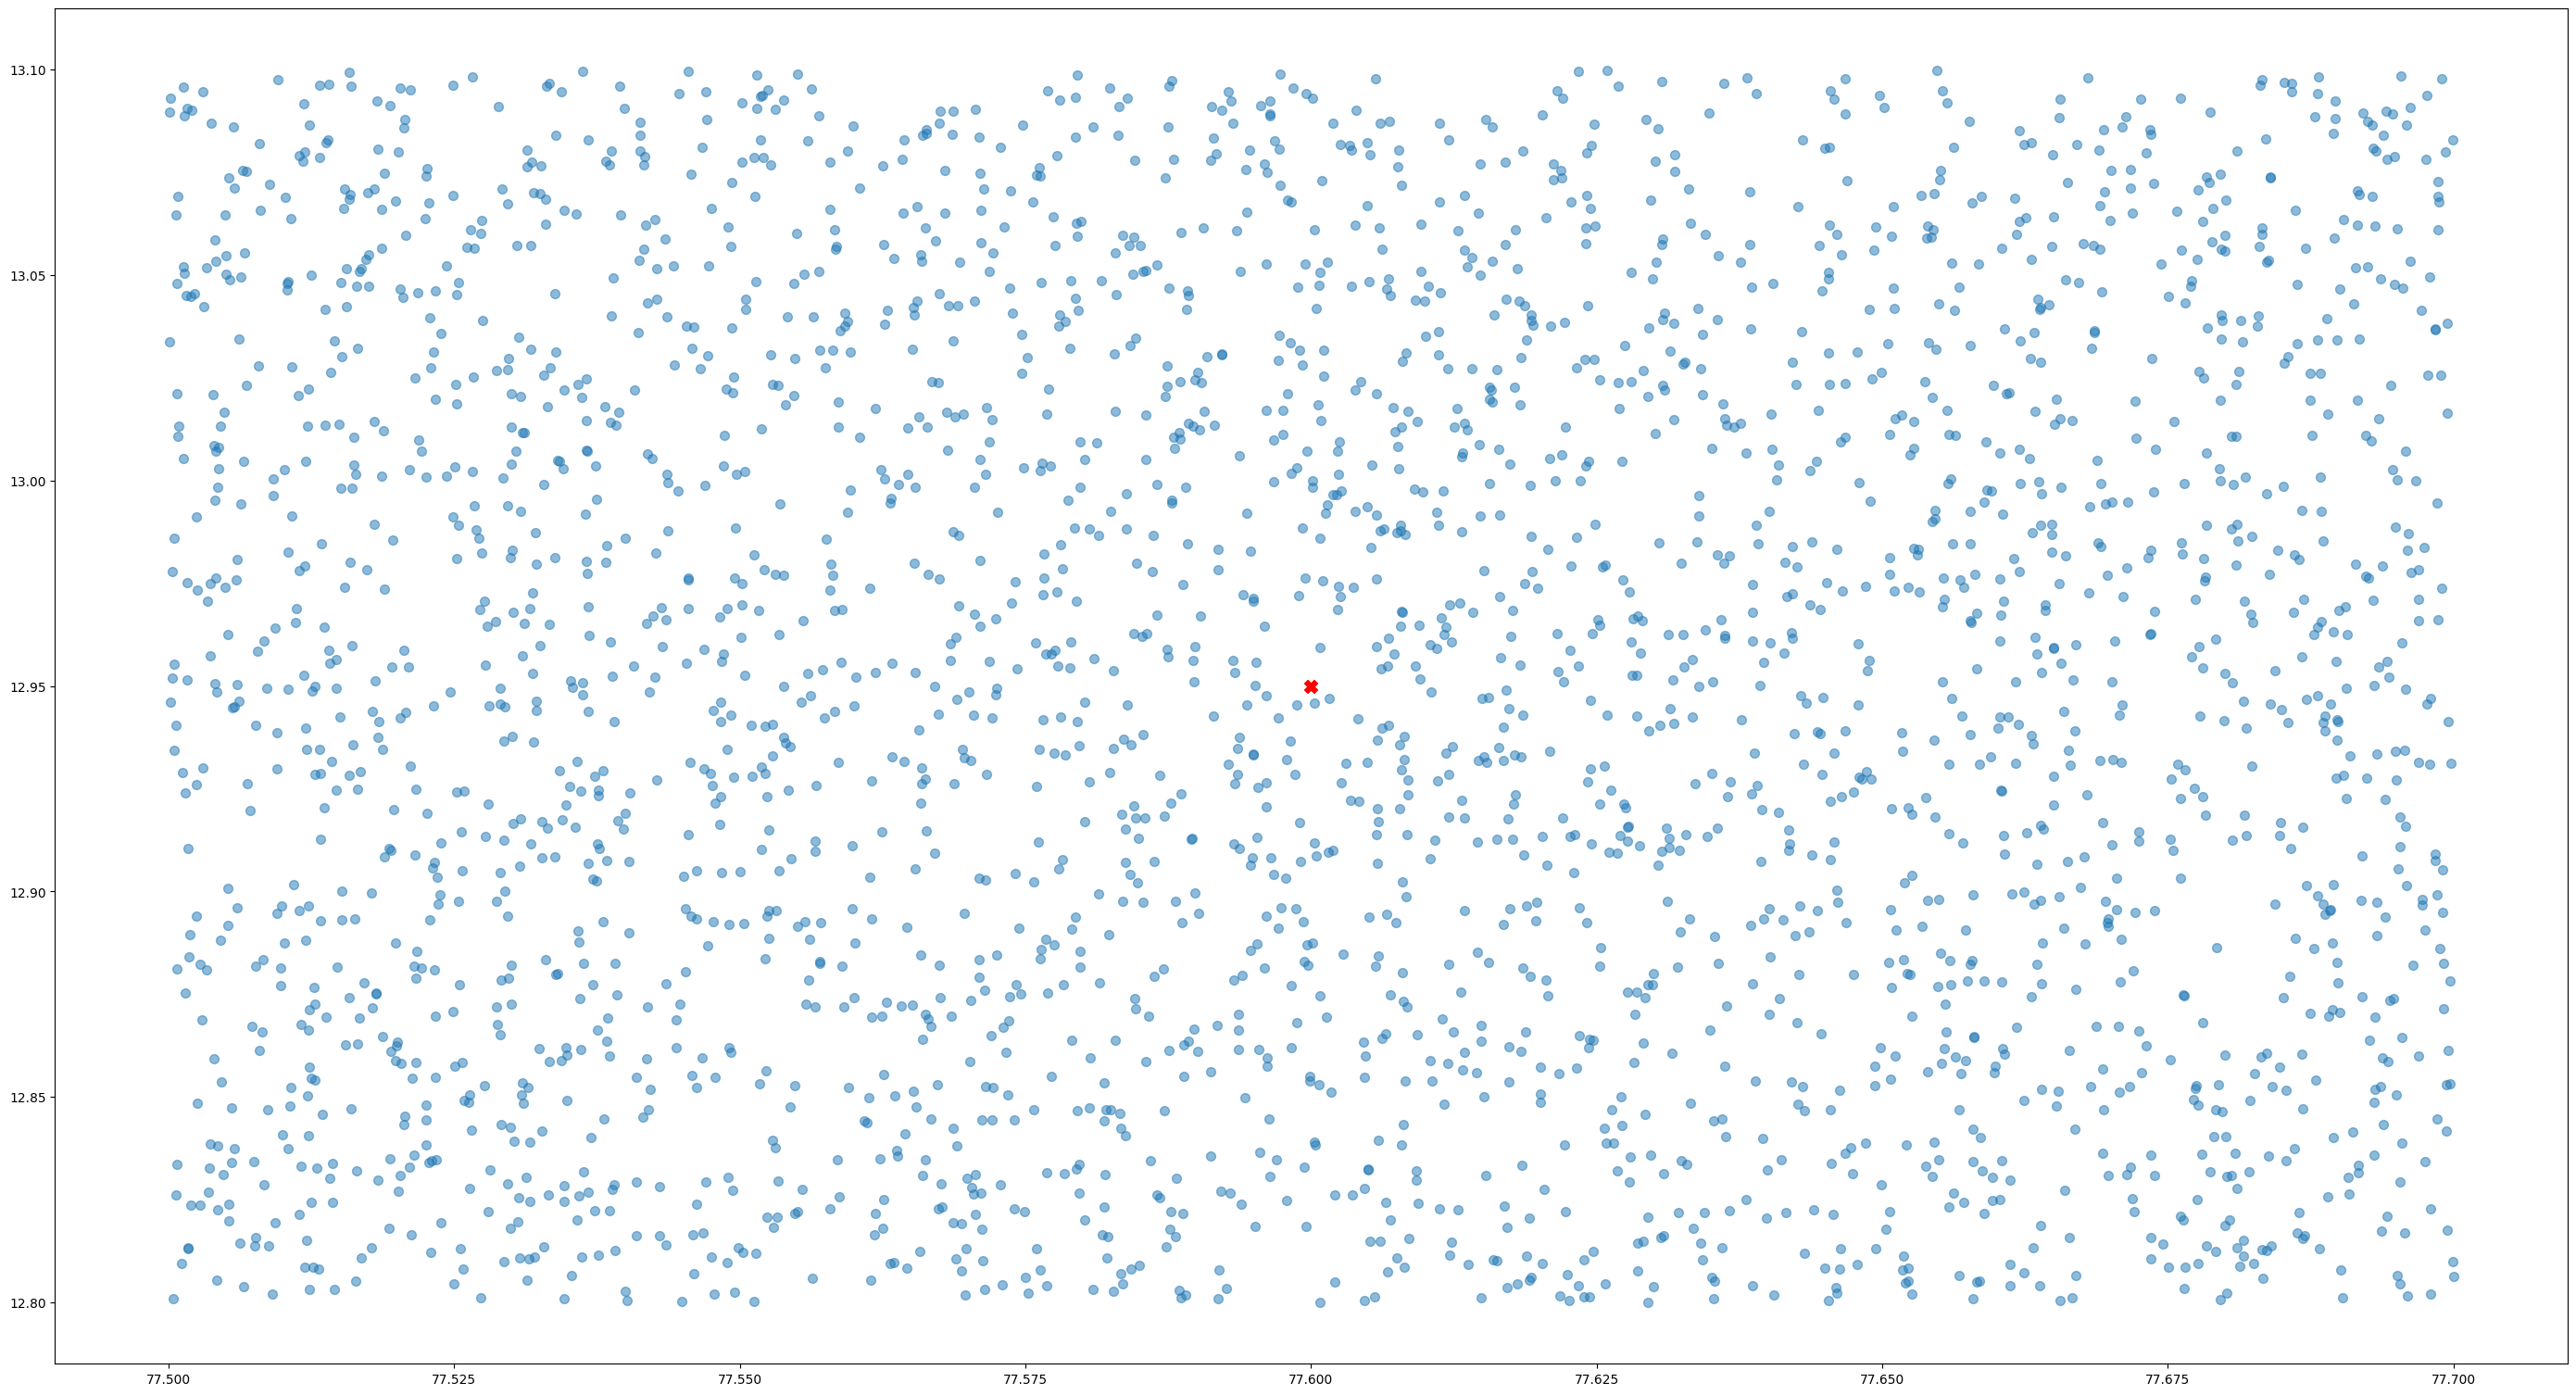

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Load your dataset (replace with actual values if needed)
latitudes = X_long_lan['Latitude']
longitudes = X_long_lan['Longitude']

# Combine into coordinate pairs
coords = np.column_stack((latitudes, longitudes))

# Build KDTree
tree = KDTree(coords)

# Define a query location (latitude, longitude)
query_point = np.array([[12.95, 77.6]])

# Find the nearest neighbor
distance, index = tree.query(query_point)

# Extract nearest neighbor coordinates
nearest_neighbor = coords[index]

# Plot the dataset
plt.figure(figsize=(35, 19))
plt.scatter(coords[:, 1], coords[:, 0], s=50, label="Data Points", alpha=0.5)
plt.scatter(query_point[:, 1], query_point[:, 0], color='red', label="Query Point", marker='X', s=100)
plt.scatter(nearest_neighbor[1], nearest_neighbor[0], color='green', label="Nearest Neighbor", marker='o', s=100)

# Draw a line connecting the query point to the nearest neighbor
plt.plot([query_point[0, 1], nearest_neighbor[1]], [query_point[0, 0], nearest_neighbor[0]], 'k--', lw=2)

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KDTree Nearest Neighbor Search")
plt.legend()
plt.grid()

# Show plot
plt.show()
